In [2]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines



Plotting NPV for btm only
-----------------------------------

   
   
 


In [3]:

project='EN1_rerun3'
study_name='value11b'
base_path='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\studies'
op = opm.Output(base_path = base_path,
                          project = project,
                          study_name = study_name)

short_name = 'value11b'

In [4]:
plot_path = os.path.join(op.plot_path,'plots_btm_npv')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [5]:
self = op
df = self.data.copy()
df_in = self.study_parameters.copy()

#df=df.set_index(['scenario'])
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,retailer_bill$_mean,retailer_receipt$_mean,self-consumption_mean,self-consumption_OLD_mean,self-sufficiency_mean,self-sufficiency_OLD_mean,solar_retailer_profit_mean,total$_building_costs_mean,total_battery_losses_mean,total_building_load_mean
scenario,,,,,,,,,,,,,,,,,,,,,
0,value11b_hpc000_000,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,76495.068595,358678.045845,100.0,100.0,0.0,0.0,0.0,358678.045845,0.0,1.106549e+06
1,value11b_hpc000_001,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,76495.068595,358678.045845,100.0,100.0,0.0,0.0,0.0,358678.045845,0.0,1.106549e+06
2,value11b_hpc000_002,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,76495.068595,358678.045845,100.0,100.0,0.0,0.0,0.0,358678.045845,0.0,1.106549e+06
3,value11b_hpc000_003,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,76495.068595,358678.045845,100.0,100.0,0.0,0.0,0.0,358678.045845,0.0,1.106549e+06
4,value11b_hpc000_004,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,76495.068595,358678.045845,100.0,100.0,0.0,0.0,0.0,358678.045845,0.0,1.106549e+06


In [6]:
df_in.head()

,pv_filename,load_folder,arrangement,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate
scenario,,,,,,,,,,,
0,NaN,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,5,0.06
1,NaN,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,10,0.06
2,NaN,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,15,0.06
3,NaN,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,20,0.06
4,NaN,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,25,0.06


In [7]:

df = df.merge(df_in,left_index = True, right_index=True)
for c in df.columns:
    if '_x' in c:
        nc = c[:-2]
        df.rename(columns={c:nc}, inplace=True)
df.head()

,scenario_label,arrangement,number_of_households,load_folder,central_battery_kWh,en_opex,en_capex_repayment,pv_capex_repayment,average_hh_bill$,average_hh_solar_bill$,...,load_folder_y,arrangement_y,pv_cap_id,cp,all_residents,parent,network_tariff,en_capex_id,a_term,a_rate
scenario,,,,,,,,,,,,,,,,,,,,,
0,value11b_hpc000_000,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,5,0.06
1,value11b_hpc000_001,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,10,0.06
2,value11b_hpc000_002,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,15,0.06
3,value11b_hpc000_003,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,20,0.06
4,value11b_hpc000_004,bau,208.0,sh_t_all_site_A,0.0,0.0,0.0,0.0,1267.028247,0.0,...,sh_t_all_site_A,bau,NaN,EASO_TOU_15pc,EASO_TOU_15pc,TIDNULL,EA310,NaN,25,0.06


In [8]:
# Set up constants
sites = ['A','E',  'D','B', 'H', 'I', 'G', 'C',  'J', 'F' ]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ordered_sites = dict(zip(sites,values))
tag_list = ['a208_f12_cp34',
 'a161_f7_cp38',
 'a138_f9_cp44',
 'a104_f8_cp57',
 'a52_f3_cp26',
 'a48_f4_cp09',
 'a44_f4_cp17',
 'a34_f4_cp33',
 'a26_f4_cp43',
 'a20_f5_cp36']
tag_dict=dict(zip(sites, tag_list))
tag_sorter= dict(zip(tag_list,values))
# Plotting set-up parameters
cmap = mpl.cm.tab10_r
alpha=1
sites_grouped={'all': sites,
              'group1': [s for s in sites if s in ['A','B','C','D','E']],
              'group2': [s for s in sites if s in['F', 'G','H','I','J']]}

a_terms =[a for a in [5,10,15,20,25] if a in df.a_term.tolist()]
dashList = [(2,8),(3,5),(10,0),(3,2,10,2),(5,2,20,2)] 
markers =['+','o','d','s','x']
term_dashes = dict(zip(a_terms,dashList))
term_markers = dict(zip(a_terms,markers))

# get pv sizes for maximum pv systems
maximums={}
pv_ref_file='C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\reference\\capex_pv_lookup.csv'
pv_ref=pd.read_csv(pv_ref_file)
pv_ref = pv_ref.set_index('pv_cap_id')
for i in pv_ref.index:
    if 'max' in i and 'site' in i:
        site = um.find_between(i,'_','_')
        maximums[site] = pv_ref.loc[i,'kW']
#en_capexes= [c for c in ['capex_low','capex_med','capex_high']if c in df.en_capex_id.tolist()]
#parents = [p for p in ['EA310_12c_FIT8', 'EA310_12c_FIT12', 'EA310_12c',\
#           'EA310_10c_FIT8', 'EA310_10c_FIT12', 'EA310_10c',\
#         'EA310_8c_FIT8', 'EA310_8c_FIT12','EA310_8c'] if p in df.parent.tolist()]

arrangements = df.arrangement.drop_duplicates().tolist()
parents_retail = list(set([p[6:] for p in df.parent.tolist() if p != 'TIDNULL']))
btmi_tariffs = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc_FIT12']
btms_tariffs = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc_FIT12','SIT_15_FIT8_allume1','SIT_15_FIT8_allume2',
               'SIT_15_FIT12_allume1','SIT_15_FIT12_allume2']

btmi_tariffs = ['EASO_TOU_15pc', 'EASO_TOU_15pc_FIT8','EASO_TOU_15pc_FIT12']
btms_tariffs = ['EASO_TOU_15pc', 'EASO_TOU_15pc_FIT8','EASO_TOU_15pc_FIT12']
               
btmp_tariffs =['SIT_15_ppa1','SIT_15_FIT8_ppa1','SIT_15_FIT12_ppa1',
                'SIT_15_ppa2', 'SIT_15_FIT8_ppa2','SIT_15_FIT12_ppa2']



bau_tariff= btmi_tariffs[0]
tariffs ={'bau': [bau_tariff],
          'btm_s_c': btms_tariffs,
          'btm_s_u' :btms_tariffs,
          'btm_i_u': btmi_tariffs,
          'btm_i_c': btmi_tariffs,
         'btm_p_c' : btmp_tariffs,
         'btm_p_u': btmp_tariffs}


In [9]:
arrangements = ['bau',
 'btm_s_c',
 'btm_s_u',
 'btm_p_c',
 'btm_p_u',
 'btm_i_u',
 'btm_i_c']

In [10]:
# Organise labels (no longer used for labels- now use site_tags)
df.loc[:,'site'] = df.loc[:,'load_folder'].apply(lambda x : x[-1])
df.loc[:, 'labels'] = df.loc[:,'site']
floors = {'A':12,'E':7, 'D':9,'B':8,'H':3,'I':4,'G':4,'C':4,'J':4,'F':5}
numhouses={'A':208,'E':161, 'D':138,'B':104,'H':52,'I':48,'G':44,'C':34,'J':26,'F':20}
labels ={}
for s, f in floors.items():
    u = numhouses[s]
    labels[s] = s +'('+str(u)+'/'+str(f)+')'
print(labels)
df.loc[:, 'label'] = df.loc[:, 'site'].apply(lambda x: labels[x])


{'A': 'A(208/12)', 'E': 'E(161/7)', 'D': 'D(138/9)', 'B': 'B(104/8)', 'H': 'H(52/3)', 'I': 'I(48/4)', 'G': 'G(44/4)', 'C': 'C(34/4)', 'J': 'J(26/4)', 'F': 'F(20/5)'}


In [11]:
# get kWp / unit , total $ / unit  and % bau for each scenario
df['pv_filename'].fillna('zero',inplace=True)
for s in df.index:
    site = df.loc[s,'load_folder'][-1]
    a_term = df.loc[s,'a_term']
    df.loc[s,'site']=site
    if df.loc[s,'pv_filename'] == 'zero':
        df.loc[s,'kwp_unit'] =0
    elif 'max' in df.loc[s,'pv_filename']:
        df.loc[s,'kwp_unit']= maximums[site]/df.loc[s,'number_of_households']
    else:
        df.loc[s,'kwp_unit'] = float(df.loc[s,'pv_filename'][-9]) + float(df.loc[s,'pv_filename'][-7])/10
    df.loc[s,'npv_unit'] = df.loc[s,'eno$_npv_building_mean']/df.loc[s,'number_of_households']
    bau_scenario = df[(df['site']==site) & (df['arrangement'] == 'bau') & (df['a_term'] == a_term)].index
    df.loc[s,'bau_npv'] = (df.loc[bau_scenario,'eno$_npv_building_mean']).values[0]/df.loc[s,'number_of_households']
    df.loc[s,'npv_cf_bau'] = df.loc[s,'npv_unit'] - df.loc[s,'bau_npv']
    df.loc[s,'npv_%_bau'] = -df.loc[s,'npv_cf_bau'] / df.loc[s,'bau_npv'] * 100
    df.loc[s,'npv_cf_bau_000'] = df.loc[s,'npv_cf_bau'] /1000
df['parent_retail']= df.loc[df['parent'] != 'TIDNULL']['parent'].apply(lambda x: x[6:])
#df['parent_retail']= df['parent'].apply(lambda x: x[6:])




In [12]:
max_baupc = df['npv_%_bau'].max()
min_baupc = df['npv_%_bau'].min()
max_baupc, min_baupc

(32.183968965395074, -55.46271476019081)

In [12]:
# #Multiple LINE PLOTS
# for group in ['all', 'group1','group2']:
#     dfg = df.copy()[df['site'].isin(sites_grouped[group])]
#     for arr in arrangements:
#         for tariff in tariffs[arr]:
# #             if 'btm_s' in arr:
# #                 capex='upfront_1'
# #             elif 'btm_p' in arr:
# #                 capex = 'ppa_1'
# #             else:
# #                 capex = ''
#             title = arr + " / " + tariff + " / "+ capex                      
#             a_slice = dfg['arrangement'] == arr
#             t_slice = dfg['all_residents'] == tariff
#             dfx=dfg.copy()[a_slice & t_slice]
           
#             if len(dfx.index)>0:
#                 # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
#                 dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
#                 dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))
#                 dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+ '_'+(dfx['aterm_str'])
#                 dfx['arr_pv'] = dfx['arrangement'] + '_'+ dfx['kwp_str']
#                 dfx = dfx.drop_duplicates('combined')
#                 #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
#                 dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']
                
#                 # ----------------------
#                 # reindex and stack data
#                 # ----------------------
#                 dfx.index = [dfx.new_label,dfx.arr_pv]
#                 dfu = dfx['npv_%_bau'].unstack()

#                 cols =dfu.columns

#                 cols = [float(c[len(arr)+1:]) for c in cols ]
#                 #cols = [0.0]+[float(c[3:]) for c in cols if 'pv' in c]
#                 dfu.columns=cols
#                 dfv=dfu.transpose()

#                 fig, ax = plt.subplots()
#                 for a_term in a_terms:
#                     a_label = '_'+str(a_term)
#                     for label in [c for c in dfv.columns if a_label in c]:       
#                         y = dfv[label].dropna()
#                         x = y.index

#                         line = ax.plot(x,y,   \
#                                        alpha=alpha,  c = cmap(sites.index(label[0])),\
#                                        linewidth = 0.5, marker = term_markers[a_term], markersize=2 ,\
#                                        linestyle='--', dashes=term_dashes[a_term])

#                 ax.set_title(title, fontsize=16, y=1.0)
#                 ax.set_xlabel("PV system (kWp)", fontsize=14)
#                 ax.set_ylabel("NPV as % of BAU costs", fontsize=14)
#                 ax.grid(True)
#                 ax.set_ylim((min_baupc*0.9,max_baupc*1.1))

#                 #Legends outside box and resize chart to fit
#                 box = ax.get_position()
#                 ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#                 # Create Legend for line types
#                 a_terms=[5,10,15,20,25]
#                 dashList = [(2,8),(3,5),(10,0),(3,2,10,2),(5,2,20,2)] 
#                 markers =['+','o','d','s','x']
#                 term_dashes = dict(zip(a_terms,dashList))
#                 term_markers = dict(zip(a_terms,markers))
#                 lline = {}
#                 for a_term in a_terms:
#                     lline[a_term] = mlines.Line2D([],[],color='black', marker=term_markers[a_term],
#                                           linestyle='--', dashes=term_dashes[a_term],
#                                              markersize=3, label=str(a_term) + " years" )
#                 handles = [lline[a] for a in a_terms]
#                 line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 0.3),prop={'size': 9})
#                 # Add the legend manually to the current Axes.
#                 ax1 = plt.gca().add_artist(line_legend)

#                 # Create legend for colours
#                 cline = {}
#                 for s in sites_grouped[group]:
#                     cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
#                 handles2 = [cline[s] for s in sites_grouped[group]]
#                 ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
#                 pname = study_name +'_'+arr + "_" + tariff + "_"+ capex + '.jpg'
                
#                 group_path = os.path.join(plot_path,group)
#                 if not os.path.exists(group_path):
#                     os.makedirs(group_path)          
#                 plotFile = os.path.join(group_path,pname)
#                 plt.savefig(plotFile,dpi=1000)

#                 plt.close()
# print('*** Completed ***')


In [13]:
# plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific')
# if not os.path.exists(plot_path):
#     os.makedirs(plot_path)
# #SPECIFIC LINE PLOTS - COMPARING BTM_S arrangements
# group = 'group2' #'all' # ['all', 'group1','group2']:
# dfg = df.copy()[df['site'].isin(sites_grouped[group])]
# arrangements = ['btm_s_c','btm_p_c']
# arr_slice = dfg['arrangement'].isin(arrangements)
# tariffs = ['EASO_TOU_15pc_FIT8','SIT_15_FIT8_ppa1']


# title = tariffs[1] # "Comparing btm_s arrangements"               
# #a_slice = dfg['a_term'] == a_term
# t_slice = dfg['all_residents'].isin(tariffs)

# dfx=dfg.copy()[ t_slice & arr_slice]
# if len(dfx.index)>0:
#     # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
#     dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
#     dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

#     dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+'_'+ dfx['aterm_str']
#     dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['aterm_str']
# #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
# #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
#     dfx = dfx.drop_duplicates('combined')
#     #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
#     dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

#     # ----------------------
#     # reindex and stack data
#     # ----------------------
#     dfx.index = [dfx.site_arr_term,dfx.kwp_unit]
#     dfu = dfx['npv_%_bau'].unstack()
#     dft=dfu.transpose()
    
#     # Select lines 
#     #linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
#     linelist = ['btm_s_c_5', 'btm_s_c_10', 'btm_s_c_20',  'btm_p_c_5']
#     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dft.columns] 
#     dfv= dft[col_list]
#     fig, ax = plt.subplots()

#     # Sort lists for legend
   
# #     dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
# #     markers =['+','o','d','s','x','^']
#     dashList = [(5,2),(3,5),(3,2,10,2),(10,0)] 
#     markers =['+','o','d','s']
#     term_dashes = dict(zip(linelist,dashList))
#     term_markers = dict(zip(linelist,markers))
    
#     for label in [c for c in dfv.columns ]:       
#         y = dfv[label].dropna()
#         x = y.index
#         l = label[2:]
#         colour = cmap(sites.index(label[0]))
#         if 'p_c' in label:
#             #colour='black'
#             linewidth = 1.0
#             markersize=3
#         else:
#             linewidth = 0.5
#             markersize=2
#         line = ax.plot(x,y,   \
#                        alpha=alpha,  c = colour ,\
#                        linewidth = linewidth, marker = term_markers[l], markersize=markersize ,\
#                        linestyle='--', dashes=term_dashes[l])

#     #ax.set_title(title, fontsize=16, y=1.0)
    
#     ax.set_xlabel("PV system (kWp)", fontsize=14)
#     ax.set_ylabel("NPV as % of BAU costs", fontsize=14)
#     ax.grid(True)
#     ax.set_ylim((85,120)) #min_baupc*0.9,max_baupc*1.1))
    
#     #Legends outside box and resize chart to fit
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     ax.text(3.3,90,'FiT: 8 c/kWh', fontsize = 10)
#     # Create Legend for line types
#     lline = {}
# #     labels = dict(zip(linelist,linelist))
# #     labels ['btm_p_c_5.0'] = 'btm_p_c'
    
#     labels =  {'btm_p_c_5': 'PPA 1',
#          'btm_s_c_10': 'Capex 10 years',
#          'btm_s_c_20':'Capex 20 years',
#          'btm_s_c_5': 'Capex 05 years'}
    
    
#     for l in linelist:
#         lline[l] = mlines.Line2D([],[],color='black', marker=term_markers[l],
#                               linestyle='--', dashes=term_dashes[l],
#                                  markersize=3, label=labels[l] )
#     handles = [lline[l] for l in linelist]
#     line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 0.5),prop={'size': 9})
#     # Add the legend manually to the current Axes.

#     ax1 = plt.gca().add_artist(line_legend)
    
#     # Create legend for colours
#     cline = {}
#     for s in sites_grouped[group]:
#         cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
#     handles2 = [cline[s] for s in sites_grouped[group]]
#     ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
#     pname = study_name +'_btm_sp_' + tariffs[1] + '.jpg'

#     group_path = os.path.join(plot_path,group)
#     if not os.path.exists(group_path):
#         os.makedirs(group_path)          
#     plotFile = os.path.join(group_path,pname)
#     plt.savefig(plotFile,dpi=1000)

# #             plt.close()
# # print('*** Completed ***')
            
# # #         if 'btm_s' in arr:
# # #         if 'allume' in tariff:
# # #             capex='allume_1'
# # #         else:
# # #             capex='upfront_1'
# # #         else:
# # #         capex = ''

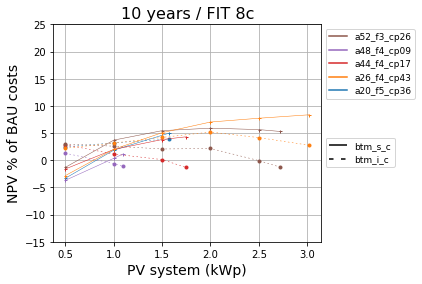

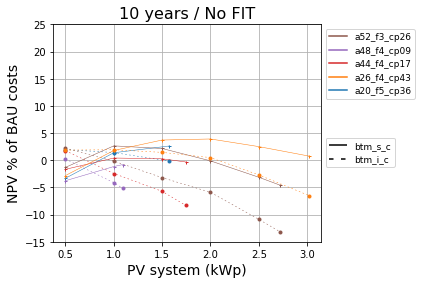

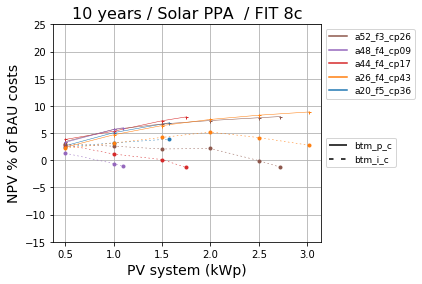

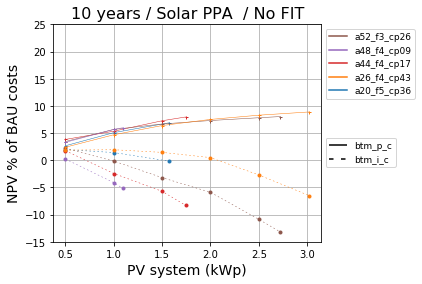

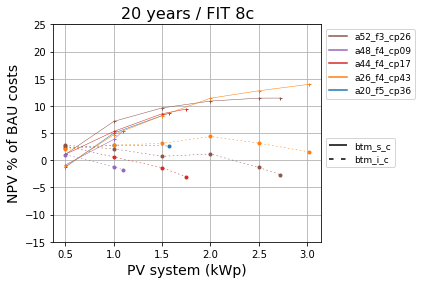

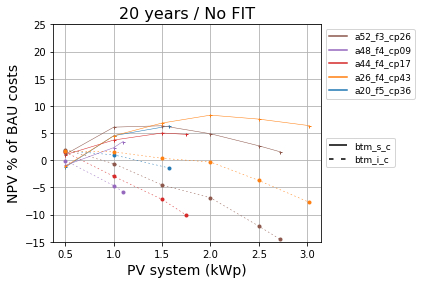

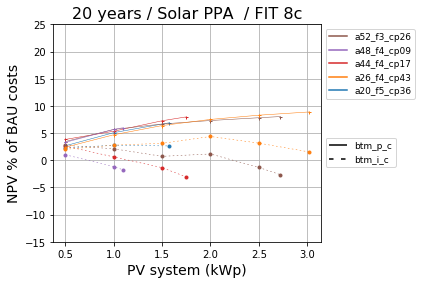

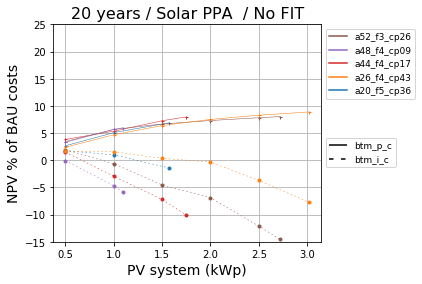

In [14]:
#Now superseded - see below
# plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific')
# if not os.path.exists(plot_path):
#     os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements
# # This one used for EN1 paper
# # Need to run this a few times with 2 versions of tariffs, different a_terms as needed
# #
# #also can rerun for btm_s_c and btm_p_c
# for a_term in [10,20]:
#     for arrangements in[ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
#         for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
#                         ['EASO_TOU_15pc', 'SIT_15_ppa1']]:

#             group = 'group2' #'all' # ['all', 'group1','group2']:
#             dfg = df.copy()[df['site'].isin(sites_grouped[group])]
#             # arrangements = ['btm_s_c','btm_i_c']
#             arr_slice = dfg['arrangement'].isin(arrangements)
#             # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
#             # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

#             # a_term = 20

#             title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

#             titles = pd.DataFrame( columns = ['btm_s_c','btm__p_c'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
#             titles.loc['EASO_TOU_15pc_FIT8','btm_s_c'] = str(a_term) + ' years / FIT 8c'
#             titles.loc['EASO_TOU_15pc_FIT8','btm_p_c'] = str(a_term) +' years / Solar PPA  / FIT 8c'
#             titles.loc['EASO_TOU_15pc','btm_s_c'] = str(a_term) + ' years / No FIT'
#             titles.loc['EASO_TOU_15pc','btm_p_c'] = str(a_term) +' years / Solar PPA  / No FIT'


#             title = titles.loc[tariffs[0],arrangements[0]]



#             #a_slice = dfg['a_term'] == a_term
#             t_slice = dfg['all_residents'].isin(tariffs)

#             dfx=dfg.copy()[ t_slice & arr_slice]
#             if len(dfx.index)>0:
#                 # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
#                 dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
#                 dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

#                 dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+'_'+ dfx['aterm_str']
#                 dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['aterm_str']
#             #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
#             #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
#                 dfx = dfx.drop_duplicates('combined')
#                 #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
#                 dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

#                 # ----------------------
#                 # reindex and stack data
#                 # ----------------------
#                 dfx.index = [dfx.site_arr_term,dfx.kwp_unit]
#                 dfu = dfx['npv_%_bau'].unstack()
#                 dfv=dfu.transpose()

#             #     # Select lines 
#             #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
#             #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
#             #     dfv= dfv[col_list]
#                 fig, ax = plt.subplots()

#                 # Sort lists for legend

#                 dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
#                 markers =['+','o','d','s','x','^']
#                 term_dashes = dict(zip(a_terms,dashList))
#                 term_markers = dict(zip(a_terms,markers))

#                 arr_dashes = dict(zip(arrangements,[(10,0),(3,5)]))
#                 arr_markers =dict(zip(arrangements,['+','o']))
#                 for label in [c for c in dfv.columns if str(a_term) in c]:       
#                     arr = [ a for a in arrangements if a in label][0]
#                     y = dfv[label].dropna()
#                     x = y.index

#                     colour = cmap(sites.index(label[0]))

#                     line = ax.plot(x,y,   \
#                                    alpha=alpha,  c = colour ,\
#                                    linewidth = 0.5, marker = arr_markers[arr], markersize=3 ,\
#                                    linestyle='--', dashes=arr_dashes[arr])

#                 ax.set_title(title, fontsize=16, y=1.0)

#                 ax.set_xlabel("PV system (kWp)", fontsize=14)
#                 ax.set_ylabel("NPV % of BAU costs", fontsize=14)
#                 ax.grid(True)
#                 ax.set_ylim((-15,25))

#                 #Legends outside box and resize chart to fit
#                 box = ax.get_position()
#                 ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#                 # Create Legend for line types

#                 lline = {}


#                 for a in arrangements:
#                     lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
#                                           linestyle='--', dashes=arr_dashes[a],
#                                              markersize=3, label=a )
#                 handles = [lline[a] for a in arrangements]
#                 line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
#                 # Add the legend manually to the current Axes.

#                 ax1 = plt.gca().add_artist(line_legend)

#                 # Create legend for colours
#                 cline = {}
#                 for s in sites_grouped[group]:
#                     cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
#                 handles2 = [cline[s] for s in sites_grouped[group]]
#                 ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
#                 pname = study_name +'_btm_i_vs_'+arrangements[0][0:5]+ '_'+str(a_term)+'_'+  tariffs[0] + '.jpg'

#                 group_path = os.path.join(plot_path,group)
#                 if not os.path.exists(group_path):
#                     os.makedirs(group_path)          
#                 plotFile = os.path.join(group_path,pname)
#                 plt.savefig(plotFile,dpi=1000)

#             #             plt.close()
#             # print('*** Completed ***')

#             # #         if 'btm_s' in arr:
#             # #         if 'allume' in tariff:
#             # #             capex='allume_1'
#             # #         else:
#             # #             capex='upfront_1'
#             # #         else:
#             # #         capex = ''

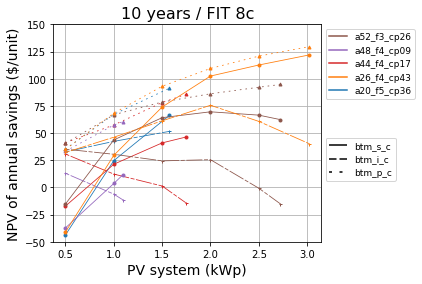

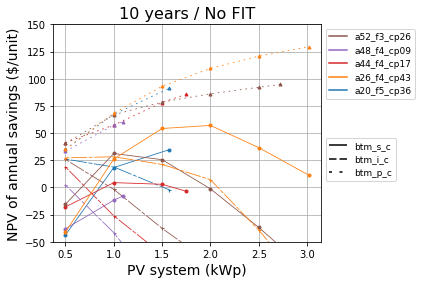

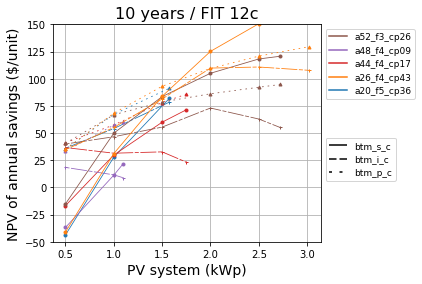

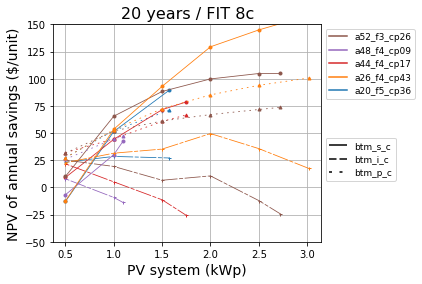

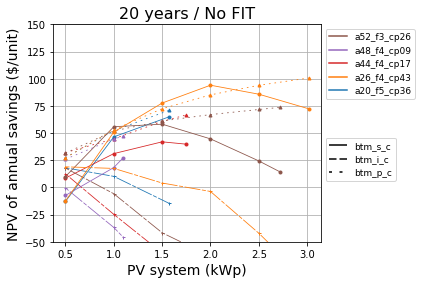

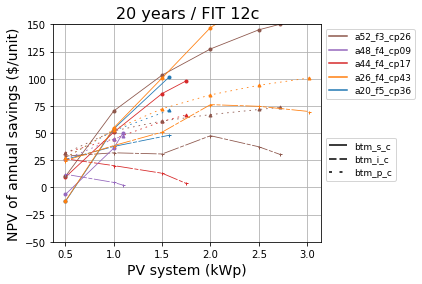

In [57]:
# Used for EN1 Fig 7 - btm s vs btm i vs btm p
# Now using npv of annual savings
# and including btm_p on same plot
plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements
# This one used for EN1 paper
#
df['npv_cf_bau_pa']= df['npv_cf_bau'].divide(df['a_term'])
for a_term in [10,20]:
    for arrangements in[['btm_s_c','btm_i_c','btm_p_c']]:  #  [ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
        for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
                        ['EASO_TOU_15pc', 'SIT_15_ppa1'],
                       ['EASO_TOU_15pc_FIT12', 'SIT_15_FIT12_ppa1']]:

            group = 'group2' #'all' # ['all', 'group1','group2']:
            dfg = df.copy()[df['site'].isin(sites_grouped[group])]
            # arrangements = ['btm_s_c','btm_i_c']
            arr_slice = dfg['arrangement'].isin(arrangements)
            # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
            # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

            # a_term = 20

            title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

            titles = pd.DataFrame( columns = ['btm_s_c','btm__p_c'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
            titles.loc['EASO_TOU_15pc_FIT8','btm_s_c'] = str(a_term) + ' years / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT8','btm_p_c'] = str(a_term) +' years / Solar PPA  / FIT 8c'
            titles.loc['EASO_TOU_15pc','btm_s_c'] = str(a_term) + ' years / No FIT'
            titles.loc['EASO_TOU_15pc','btm_p_c'] = str(a_term) +' years / Solar PPA  / No FIT'
            titles.loc['EASO_TOU_15pc_FIT12','btm_s_c'] = str(a_term) + ' years / FIT 12c'


            title = titles.loc[tariffs[0],arrangements[0]]



            #a_slice = dfg['a_term'] == a_term
            t_slice = dfg['all_residents'].isin(tariffs)

            dfx=dfg.copy()[ t_slice & arr_slice]
            if len(dfx.index)>0:
                # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
                dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
                dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

                dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+'_'+ dfx['aterm_str']
                dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['aterm_str']
            #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
            #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
                dfx = dfx.drop_duplicates('combined')
                #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
                dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

                # ----------------------
                # reindex and stack data
                # ----------------------
                dfx.index = [dfx.site_arr_term,dfx.kwp_unit]
                dfu = dfx['npv_cf_bau_pa'].unstack()
                dfv=dfu.transpose()

            #     # Select lines 
            #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
            #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
            #     dfv= dfv[col_list]
                fig, ax = plt.subplots()

                # Sort lists for legend

                dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
                markers =['+','o','d','s','x','^']
                term_dashes = dict(zip(a_terms,dashList))
                term_markers = dict(zip(a_terms,markers))

                arr_dashes = dict(zip(arrangements,[(10,0),(5,2,20,2),(2,5)]))
                arr_markers =dict(zip(arrangements,['o','+','^']))
                for label in [c for c in dfv.columns if str(a_term) in c]:       
                    arr = [ a for a in arrangements if a in label][0]
                    y = dfv[label].dropna()
                    x = y.index

                    colour = cmap(sites.index(label[0]))

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = colour ,\
                                   linewidth = 0.8, marker = arr_markers[arr], markersize=3 ,\
                                   linestyle='--', dashes=arr_dashes[arr])

                ax.set_title(title, fontsize=16, y=1.0)

                ax.set_xlabel("PV system (kWp)", fontsize=14)
                ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
                ax.grid(True)
                ax.set_ylim((-50, 150))

                #Legends outside box and resize chart to fit
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Create Legend for line types

                lline = {}


                for a in arrangements:
                    lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
                                          linestyle='--', dashes=arr_dashes[a],
                                             markersize=3, label=a )
                handles = [lline[a] for a in arrangements]
                line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
                # Add the legend manually to the current Axes.

                ax1 = plt.gca().add_artist(line_legend)

                # Create legend for colours
                cline = {}
                for s in sites_grouped[group]:
                    cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
                handles2 = [cline[s] for s in sites_grouped[group]]
                ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
                pname = study_name +'_btm_i_vs_'+arrangements[0][0:5]+ '_'+str(a_term)+'_'+  tariffs[0] + '.jpg'

                group_path = os.path.join(plot_path,group)
                if not os.path.exists(group_path):
                    os.makedirs(group_path)          
                plotFile = os.path.join(group_path,pname)
                plt.savefig(plotFile,dpi=1000)

            #             plt.close()
            # print('*** Completed ***')

            # #         if 'btm_s' in arr:
            # #         if 'allume' in tariff:
            # #             capex='allume_1'
            # #         else:
            # #             capex='upfront_1'
            # #         else:
            #         capex = ''

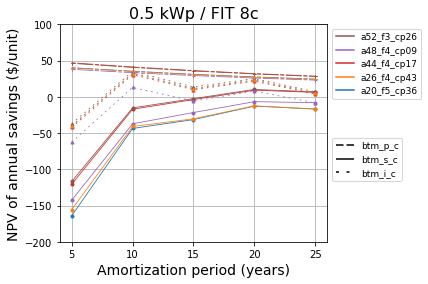

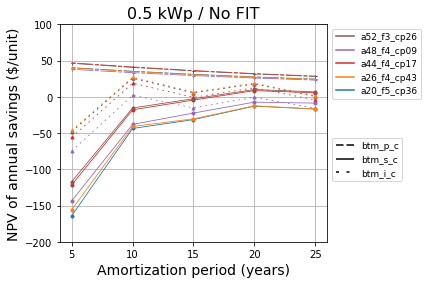

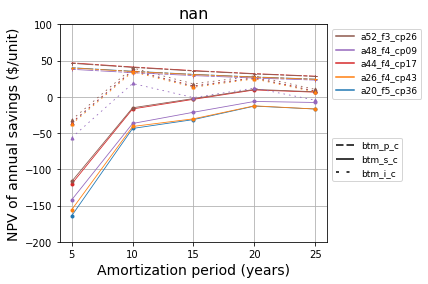

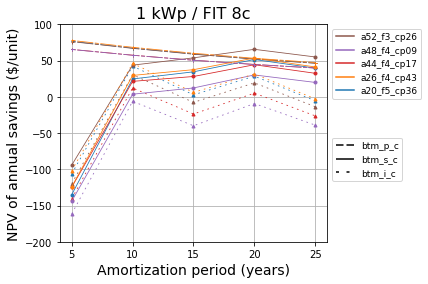

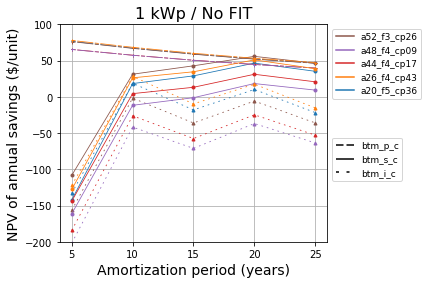

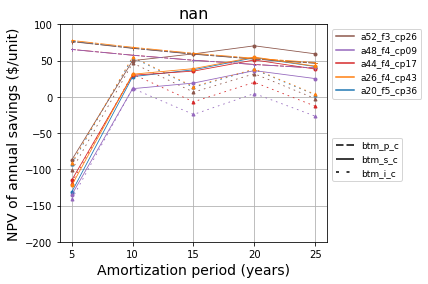

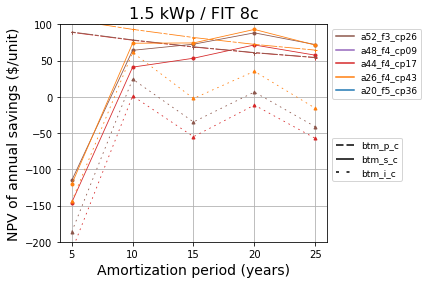

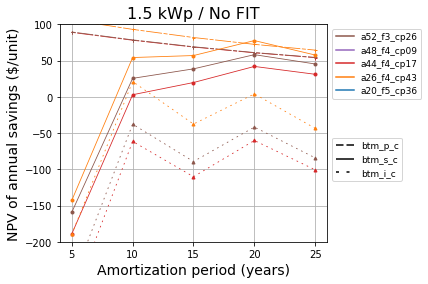

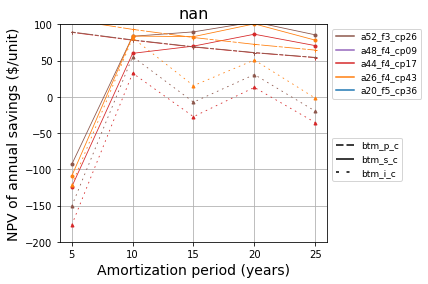

In [58]:
# As above but plotting vs a_term for fixed PV
# Used for EN1 Fig 7 - btm s vs btm i vs btm p
# Now using npv of annual savings
# and including btm_p on same plot
plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements
# This one used for EN1 paper
# Need to run this a few times with 2 versions of tariffs, different a_terms as needed
#
#also can rerun for btm_s_c and btm_p_c
df['npv_cf_bau_pa']= df['npv_cf_bau'].divide(df['a_term'])
for pv in [0.5,1,1.5]:
    for arrangements in[['btm_p_c','btm_s_c','btm_i_c']]:  #  [ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
        for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
                        ['EASO_TOU_15pc', 'SIT_15_ppa1'],
                       ['EASO_TOU_15pc_FIT12', 'SIT_15_FIT12_ppa1']]:

            group = 'group2' #'all' # ['all', 'group1','group2']:
            dfg = df.copy()[df['site'].isin(sites_grouped[group])]
            # arrangements = ['btm_s_c','btm_i_c']
            arr_slice = dfg['arrangement'].isin(arrangements)
            # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
            # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

            # a_term = 20

            title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

            titles = pd.DataFrame( columns = ['btm_s_c','btm__p_c'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
            titles.loc['EASO_TOU_15pc_FIT8','btm_s_c'] = str(pv) + ' kWp / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT8','btm_p_c'] = str(pv) +' kWp / FIT 8c'
            titles.loc['EASO_TOU_15pc','btm_s_c'] = str(pv) + ' kWp / No FIT'
            titles.loc['EASO_TOU_15pc','btm_p_c'] = str(pv) +' kWp / No FIT'
            titles.loc['EASO_TOU_15pc_FIT12','btm_s_c'] = str(pv) + ' kWp / FIT 12c'


            title = titles.loc[tariffs[0],arrangements[0]]



            #a_slice = dfg['a_term'] == a_term
            p_slice = dfg['kwp_unit']==pv
            t_slice = dfg['all_residents'].isin(tariffs)

            dfx=dfg.copy()[ t_slice & arr_slice & p_slice]
            if len(dfx.index)>0:
                # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
                dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
                dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

                dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+dfx['aterm_str'] +'_'+ dfx['aterm_str']
                dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['kwp_str']
            #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
            #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
                dfx = dfx.drop_duplicates('combined')
                #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
                dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

                # ----------------------
                # reindex and stack data
                # ----------------------
                dfx.index = [dfx.site_arr_term,dfx.a_term]
                dfu = dfx['npv_cf_bau_pa'].unstack()
                dfv=dfu.transpose()

            #     # Select lines 
            #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
            #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
            #     dfv= dfv[col_list]
                fig, ax = plt.subplots()

                # Sort lists for legend

                dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
                markers =['+','o','d','s','x','^']
                term_dashes = dict(zip(a_terms,dashList))
                term_markers = dict(zip(a_terms,markers))

                arr_dashes = dict(zip(arrangements,[(5,2,20,2),(10,0),(2,5)]))
                arr_markers =dict(zip(arrangements,['+','o','^']))
                for label in [c for c in dfv.columns if str(pv) in c]:       
                    arr = [ a for a in arrangements if a in label][0]
                    y = dfv[label].dropna()
                    x = y.index

                    colour = cmap(sites.index(label[0]))

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = colour ,\
                                   linewidth = 0.8, marker = arr_markers[arr], markersize=3 ,\
                                   linestyle='--', dashes=arr_dashes[arr])

                ax.set_title(title, fontsize=16, y=1.0)

                ax.set_xlabel("Amortization period (years)", fontsize=14)
                ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
                ax.grid(True)
                ax.set_ylim((-200, 100))

                #Legends outside box and resize chart to fit
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Create Legend for line types

                lline = {}


                for a in arrangements:
                    lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
                                          linestyle='--', dashes=arr_dashes[a],
                                             markersize=3, label=a )
                handles = [lline[a] for a in arrangements]
                line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
                # Add the legend manually to the current Axes.

                ax1 = plt.gca().add_artist(line_legend)

                # Create legend for colours
                cline = {}
                for s in sites_grouped[group]:
                    cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
                handles2 = [cline[s] for s in sites_grouped[group]]
                ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
                pname = study_name +'_btm_vs_aterm_'+str(pv)+'_'+  tariffs[0] + '.jpg'

                group_path = os.path.join(plot_path,group)
                if not os.path.exists(group_path):
                    os.makedirs(group_path)          
                plotFile = os.path.join(group_path,pname)
                plt.savefig(plotFile,dpi=1000)

            #             plt.close()
            # print('*** Completed ***')

            # #         if 'btm_s' in arr:
            # #         if 'allume' in tariff:
            # #             capex='allume_1'
            # #         else:
            # #             capex='upfront_1'
            # #         else:
            #         capex = ''

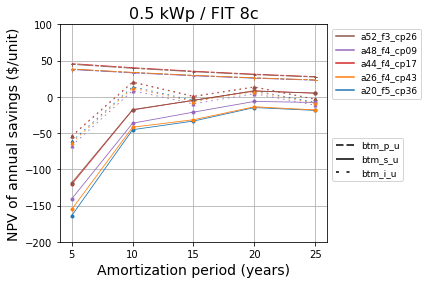

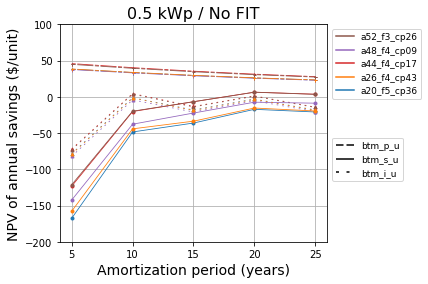

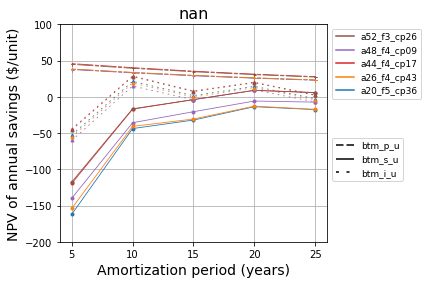

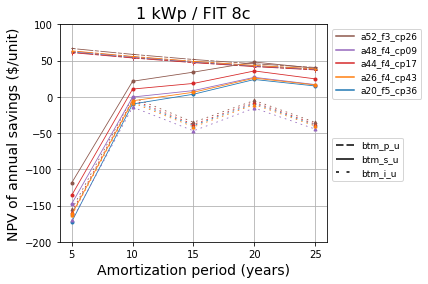

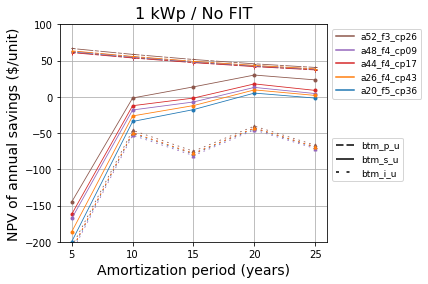

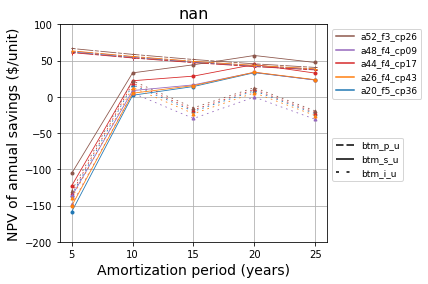

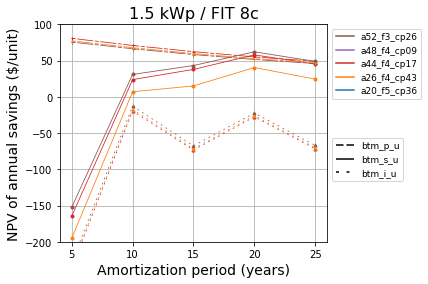

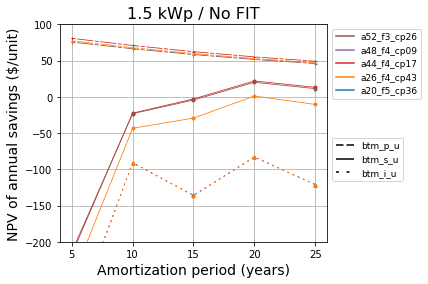

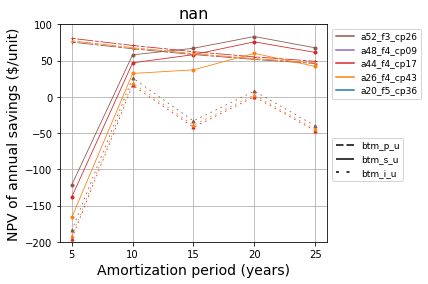

In [17]:
# As above but without supplying cp
# plotting vs a_term for fixed PV
# Used for EN1 Fig 7 - btm s vs btm i vs btm p
# Now using npv of annual savings
# and including btm_p on same plot
plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific_U')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements

df['npv_cf_bau_pa']= df['npv_cf_bau'].divide(df['a_term'])
for pv in [0.5,1,1.5]:
    for arrangements in[['btm_p_u','btm_s_u','btm_i_u']]:  #  [ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
        for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
                        ['EASO_TOU_15pc', 'SIT_15_ppa1'],
                       ['EASO_TOU_15pc_FIT12', 'SIT_15_FIT12_ppa1']]:

            group = 'group2' #'all' # ['all', 'group1','group2']:
            dfg = df.copy()[df['site'].isin(sites_grouped[group])]
            # arrangements = ['btm_s_c','btm_i_c']
            arr_slice = dfg['arrangement'].isin(arrangements)
            # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
            # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

            # a_term = 20

            title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

            titles = pd.DataFrame( columns = ['btm_s_u','btm__p_u'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
            titles.loc['EASO_TOU_15pc_FIT8','btm_s_u'] = str(pv) + ' kWp / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT8','btm_p_u'] = str(pv) +' kWp / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT12','btm_s_u'] = str(pv) +' kWp / FIT 12c'
            titles.loc['EASO_TOU_15pc','btm_s_u'] = str(pv) + ' kWp / No FIT'
            titles.loc['EASO_TOU_15pc','btm_p_u'] = str(pv) +' kWp / No FIT'


            title = titles.loc[tariffs[0],arrangements[0]]



            #a_slice = dfg['a_term'] == a_term
            p_slice = dfg['kwp_unit']==pv
            t_slice = dfg['all_residents'].isin(tariffs)

            dfx=dfg.copy()[ t_slice & arr_slice & p_slice]
            if len(dfx.index)>0:
                # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
                dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
                dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

                dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+dfx['aterm_str'] +'_'+ dfx['aterm_str']
                dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['kwp_str']
            #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
            #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
                dfx = dfx.drop_duplicates('combined')
                #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
                dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

                # ----------------------
                # reindex and stack data
                # ----------------------
                dfx.index = [dfx.site_arr_term,dfx.a_term]
                dfu = dfx['npv_cf_bau_pa'].unstack()
                dfv=dfu.transpose()

            #     # Select lines 
            #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
            #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
            #     dfv= dfv[col_list]
                fig, ax = plt.subplots()

                # Sort lists for legend

                dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
                markers =['+','o','d','s','x','^']
                term_dashes = dict(zip(a_terms,dashList))
                term_markers = dict(zip(a_terms,markers))

                arr_dashes = dict(zip(arrangements,[(5,2,20,2),(10,0),(2,5)]))
                arr_markers =dict(zip(arrangements,['+','o','^']))
                for label in [c for c in dfv.columns if str(pv) in c]:       
                    arr = [ a for a in arrangements if a in label][0]
                    y = dfv[label].dropna()
                    x = y.index

                    colour = cmap(sites.index(label[0]))

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = colour ,\
                                   linewidth = 0.8, marker = arr_markers[arr], markersize=3 ,\
                                   linestyle='--', dashes=arr_dashes[arr])

                ax.set_title(title, fontsize=16, y=1.0)

                ax.set_xlabel("Amortization period (years)", fontsize=14)
                ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
                ax.grid(True)
                ax.set_ylim((-200, 100))

                #Legends outside box and resize chart to fit
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Create Legend for line types

                lline = {}


                for a in arrangements:
                    lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
                                          linestyle='--', dashes=arr_dashes[a],
                                             markersize=3, label=a )
                handles = [lline[a] for a in arrangements]
                line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
                # Add the legend manually to the current Axes.

                ax1 = plt.gca().add_artist(line_legend)

                # Create legend for colours
                cline = {}
                for s in sites_grouped[group]:
                    cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
                handles2 = [cline[s] for s in sites_grouped[group]]
                ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
                pname = study_name +'_btm_U_vs_aterm_'+str(pv)+'_'+  tariffs[0] + '.jpg'

                group_path = os.path.join(plot_path,group)
                if not os.path.exists(group_path):
                    os.makedirs(group_path)          
                plotFile = os.path.join(group_path,pname)
                plt.savefig(plotFile,dpi=1000)

            #             plt.close()
            # print('*** Completed ***')

            # #         if 'btm_s' in arr:
            # #         if 'allume' in tariff:
            # #             capex='allume_1'
            # #         else:
            # #             capex='upfront_1'
            # #         else:
            #         capex = ''

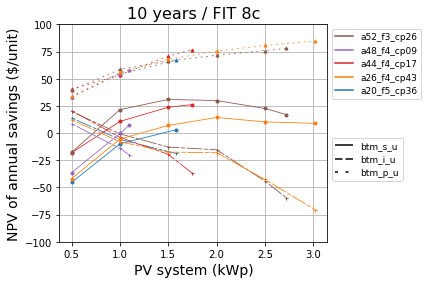

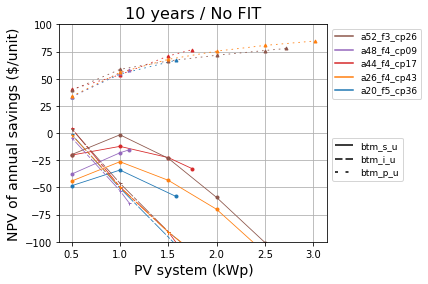

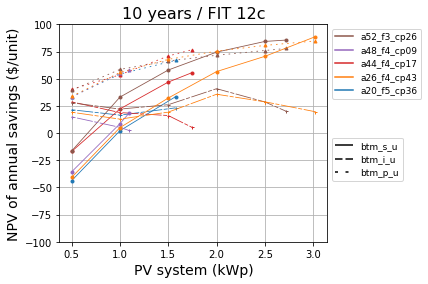

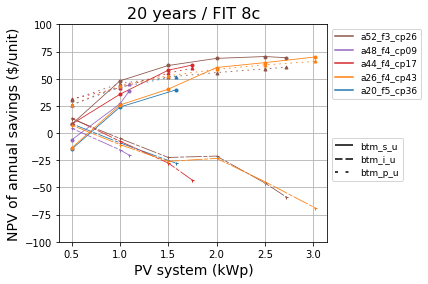

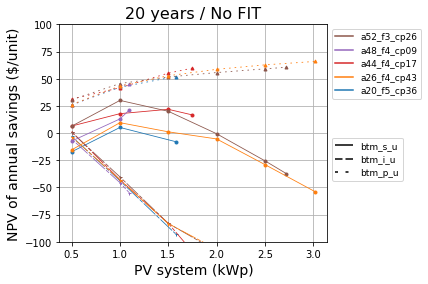

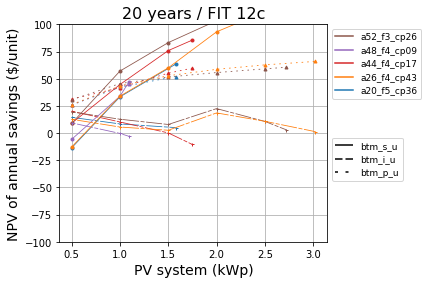

In [20]:
#As above ploting versus PV for btm_u arrangements:
# Used for EN1 Fig 7 - btm s vs btm i vs btm p
# Now using npv of annual savings
# and including btm_p on same plot
plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific_U')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements
# This one used for EN1 paper
#
df['npv_cf_bau_pa']= df['npv_cf_bau'].divide(df['a_term'])
for a_term in [10,20]:
    for arrangements in[['btm_s_u','btm_i_u','btm_p_u']]:  #  [ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
        for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
                        ['EASO_TOU_15pc', 'SIT_15_ppa1'],
                       ['EASO_TOU_15pc_FIT12', 'SIT_15_FIT12_ppa1']]:

            group = 'group2' #'all' # ['all', 'group1','group2']:
            dfg = df.copy()[df['site'].isin(sites_grouped[group])]
            # arrangements = ['btm_s_c','btm_i_c']
            arr_slice = dfg['arrangement'].isin(arrangements)
            # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
            # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

            # a_term = 20

            title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

            titles = pd.DataFrame( columns = ['btm_s_u','btm__p_u'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
            titles.loc['EASO_TOU_15pc_FIT8','btm_s_u'] = str(a_term) + ' years / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT8','btm_p_u'] = str(a_term) +' years / Solar PPA  / FIT 8c'
            titles.loc['EASO_TOU_15pc','btm_s_u'] = str(a_term) + ' years / No FIT'
            titles.loc['EASO_TOU_15pc','btm_p_u'] = str(a_term) +' years / Solar PPA  / No FIT'
            titles.loc['EASO_TOU_15pc_FIT12','btm_s_u'] = str(a_term) + ' years / FIT 12c'
            


            title = titles.loc[tariffs[0],arrangements[0]]



            #a_slice = dfg['a_term'] == a_term
            t_slice = dfg['all_residents'].isin(tariffs)

            dfx=dfg.copy()[ t_slice & arr_slice]
            if len(dfx.index)>0:
                # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
                dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
                dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

                dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+'_'+ dfx['aterm_str']
                dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['aterm_str']
            #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
            #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
                dfx = dfx.drop_duplicates('combined')
                #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
                dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

                # ----------------------
                # reindex and stack data
                # ----------------------
                dfx.index = [dfx.site_arr_term,dfx.kwp_unit]
                dfu = dfx['npv_cf_bau_pa'].unstack()
                dfv=dfu.transpose()

            #     # Select lines 
            #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
            #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
            #     dfv= dfv[col_list]
                fig, ax = plt.subplots()

                # Sort lists for legend

                dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
                markers =['+','o','d','s','x','^']
                term_dashes = dict(zip(a_terms,dashList))
                term_markers = dict(zip(a_terms,markers))

                arr_dashes = dict(zip(arrangements,[(10,0),(5,2,20,2),(2,5)]))
                arr_markers =dict(zip(arrangements,['o','+','^']))
                for label in [c for c in dfv.columns if str(a_term) in c]:       
                    arr = [ a for a in arrangements if a in label][0]
                    y = dfv[label].dropna()
                    x = y.index

                    colour = cmap(sites.index(label[0]))

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = colour ,\
                                   linewidth = 0.8, marker = arr_markers[arr], markersize=3 ,\
                                   linestyle='--', dashes=arr_dashes[arr])

                ax.set_title(title, fontsize=16, y=1.0)

                ax.set_xlabel("PV system (kWp)", fontsize=14)
                ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
                ax.grid(True)
                ax.set_ylim((-100, 100))
                #ax.set_xlim(0.25,2.25)

                #Legends outside box and resize chart to fit
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Create Legend for line types

                lline = {}


                for a in arrangements:
                    lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
                                          linestyle='--', dashes=arr_dashes[a],
                                             markersize=3, label=a )
                handles = [lline[a] for a in arrangements]
                line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
                # Add the legend manually to the current Axes.

                ax1 = plt.gca().add_artist(line_legend)

                # Create legend for colours
                cline = {}
                for s in sites_grouped[group]:
                    cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
                handles2 = [cline[s] for s in sites_grouped[group]]
                ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
                pname = study_name +'_btm_i_vs_'+arrangements[0][0:5]+ '_'+str(a_term)+'_'+  tariffs[0] + '.jpg'

                group_path = os.path.join(plot_path,group)
                if not os.path.exists(group_path):
                    os.makedirs(group_path)          
                plotFile = os.path.join(group_path,pname)
                plt.savefig(plotFile,dpi=1000)

            #             plt.close()
            # print('*** Completed ***')

            # #         if 'btm_s' in arr:
            # #         if 'allume' in tariff:
            # #             capex='allume_1'
            # #         else:
            # #             capex='upfront_1'
            # #         else:
            #         capex = ''

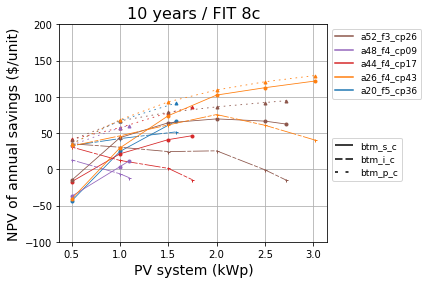

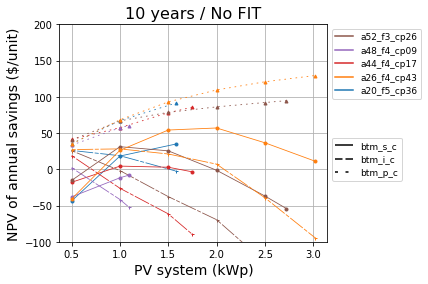

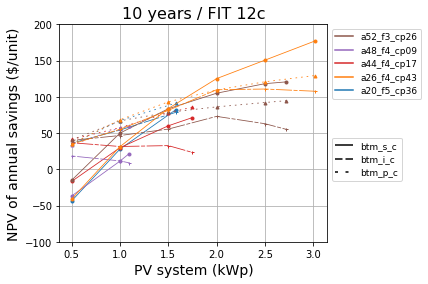

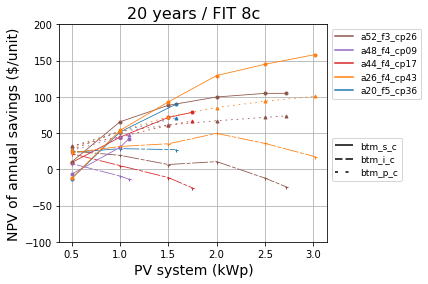

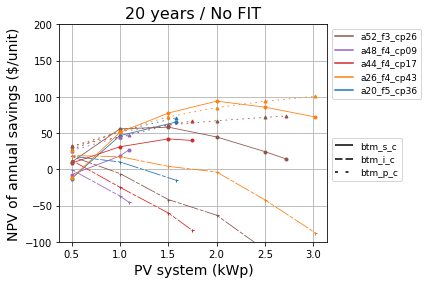

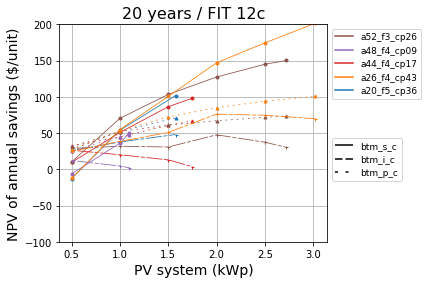

In [23]:
# As above but _c instead of _u
# As above plttong versus PV for btm_u arrangements:
# Used for EN1 Fig 7 - btm s vs btm i vs btm p
# Now using npv of annual savings
# and including btm_p on same plot
plot_path = os.path.join(op.plot_path,'plots_btm_npv_specific_C')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)#SPECIFIC LINE PLOTS - COMPARING BTM_i and btm_s arrangements
# This one used for EN1 paper
#
df['npv_cf_bau_pa']= df['npv_cf_bau'].divide(df['a_term'])
for a_term in [10,20]:
    for arrangements in[['btm_s_c','btm_i_c','btm_p_c']]:  #  [ ['btm_s_c','btm_i_c'],['btm_p_c','btm_i_c']]:
        for tariffs in [['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1'],
                        ['EASO_TOU_15pc', 'SIT_15_ppa1'],
                       ['EASO_TOU_15pc_FIT12', 'SIT_15_FIT12_ppa1']]:

            group = 'group2' #'all' # ['all', 'group1','group2']:
            dfg = df.copy()[df['site'].isin(sites_grouped[group])]
            # arrangements = ['btm_s_c','btm_i_c']
            arr_slice = dfg['arrangement'].isin(arrangements)
            # #tariffs = ['EASO_TOU_15pc_FIT8', 'SIT_15_FIT8_ppa1']
            # tariffs = ['EASO_TOU_15pc', 'SIT_15_ppa1']

            # a_term = 20

            title = arrangements[0][0:5]+ '_'+ tariffs[0] + ' / '+str(a_term)+  'years'# "Comparing btm_s arrangements"               

            titles = pd.DataFrame( columns = ['btm_s_c','btm__p_c'], index = ['EASO_TOU_15pc_FIT8','EASO_TOU_15pc'])
            titles.loc['EASO_TOU_15pc_FIT8','btm_s_c'] = str(a_term) + ' years / FIT 8c'
            titles.loc['EASO_TOU_15pc_FIT8','btm_p_c'] = str(a_term) +' years / Solar PPA  / FIT 8c'
            titles.loc['EASO_TOU_15pc','btm_s_c'] = str(a_term) + ' years / No FIT'
            titles.loc['EASO_TOU_15pc','btm_p_c'] = str(a_term) +' years / Solar PPA  / No FIT'
            titles.loc['EASO_TOU_15pc_FIT12','btm_s_c'] = str(a_term) + ' years / FIT 12c'
            


            title = titles.loc[tariffs[0],arrangements[0]]



            #a_slice = dfg['a_term'] == a_term
            t_slice = dfg['all_residents'].isin(tariffs)

            dfx=dfg.copy()[ t_slice & arr_slice]
            if len(dfx.index)>0:
                # Get rid of duplicates - assumed irrelevant as only variation is internal tariffs
                dfx.loc[:,'kwp_str'] = dfx.loc[:,'kwp_unit'].apply(lambda x : str(round(x,2)))
                dfx.loc[:,'aterm_str'] = dfx.loc[:,'a_term'].apply(lambda x : str(round(x,0)))

                dfx['combined'] = dfx['site']+ '_' + dfx['arrangement'] + '_'+ dfx['kwp_str']+'_'+ dfx['aterm_str']
                dfx['site_arr_term'] = dfx['site'] + '_' + dfx['arrangement'] +'_'+ dfx['aterm_str']
            #     dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] = \
            #                 dfx.loc[dfx['arrangement'].str.contains('btm_s'),'site_arr_term'] + dfx['aterm_str']
                dfx = dfx.drop_duplicates('combined')
                #fx['combined'] = dfx['combined'].apply(lambda x: x[1:])
                dfx['new_label']= dfx['label']+ '_'+ dfx['aterm_str']

                # ----------------------
                # reindex and stack data
                # ----------------------
                dfx.index = [dfx.site_arr_term,dfx.kwp_unit]
                dfu = dfx['npv_cf_bau_pa'].unstack()
                dfv=dfu.transpose()

            #     # Select lines 
            #     linelist = ['btm_s_c_5.0', 'btm_s_c_10.0', 'btm_s_c_15.0', 'btm_s_c_20.0', 'btm_s_c_25.0', 'btm_p_c_5.0']
            #     col_list = [c for c in [site + '_' + line for site in sites_grouped[group] for line in linelist]if c in dfv.columns] 
            #     dfv= dfv[col_list]
                fig, ax = plt.subplots()

                # Sort lists for legend

                dashList = [(2,8),(3,5),(5,2),(3,2,10,2),(5,2,20,2),(10,0)] 
                markers =['+','o','d','s','x','^']
                term_dashes = dict(zip(a_terms,dashList))
                term_markers = dict(zip(a_terms,markers))

                arr_dashes = dict(zip(arrangements,[(10,0),(5,2,20,2),(2,5)]))
                arr_markers =dict(zip(arrangements,['o','+','^']))
                for label in [c for c in dfv.columns if str(a_term) in c]:       
                    arr = [ a for a in arrangements if a in label][0]
                    y = dfv[label].dropna()
                    x = y.index

                    colour = cmap(sites.index(label[0]))

                    line = ax.plot(x,y,   \
                                   alpha=alpha,  c = colour ,\
                                   linewidth = 0.8, marker = arr_markers[arr], markersize=3 ,\
                                   linestyle='--', dashes=arr_dashes[arr])

                ax.set_title(title, fontsize=16, y=1.0)

                ax.set_xlabel("PV system (kWp)", fontsize=14)
                ax.set_ylabel("NPV of annual savings ($/unit)", fontsize=14)
                ax.grid(True)
                ax.set_ylim((-100, 200))
                #ax.set_xlim(0.25,2.25)

                #Legends outside box and resize chart to fit
                box = ax.get_position()
                ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Create Legend for line types

                lline = {}


                for a in arrangements:
                    lline[a] = mlines.Line2D([],[],color='black', #marker=term_markers[a],
                                          linestyle='--', dashes=arr_dashes[a],
                                             markersize=3, label=a )
                handles = [lline[a] for a in arrangements]
                line_legend = ax.legend(handles = handles, loc='upper left', bbox_to_anchor=(1,0.5),prop={'size': 9})
                # Add the legend manually to the current Axes.

                ax1 = plt.gca().add_artist(line_legend)

                # Create legend for colours
                cline = {}
                for s in sites_grouped[group]:
                    cline[s] = mlines.Line2D([],[],color=cmap(sites.index(s)) , label=tag_dict[s])
                handles2 = [cline[s] for s in sites_grouped[group]]
                ax.legend(handles = handles2, loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 9})
                pname = study_name +'_btm_i_vs_'+arrangements[0][0:5]+ '_'+str(a_term)+'_'+  tariffs[0] + '.jpg'

                group_path = os.path.join(plot_path,group)
                if not os.path.exists(group_path):
                    os.makedirs(group_path)          
                plotFile = os.path.join(group_path,pname)
                plt.savefig(plotFile,dpi=1000)

            #             plt.close()
            # print('*** Completed ***')

            # #         if 'btm_s' in arr:
            # #         if 'allume' in tariff:
            # #             capex='allume_1'
            # #         else:
            # #             capex='upfront_1'
            # #         else:
            #         capex = ''